# Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Inspection

In [4]:
train = pd.read_csv('train_0OECtn8.csv')
test = pd.read_csv('test_1zqHu22.csv')

In [5]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [6]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [7]:
train.shape,test.shape

((89197, 10), (11121, 9))

#### We have 89197 rows and 10 columns in Train set whereas Test set has 11121 rows and 9 columns.

In [8]:
train.isnull().sum()/train.shape[0] *100

row_id              0.0
user_id             0.0
category_id         0.0
video_id            0.0
age                 0.0
gender              0.0
profession          0.0
followers           0.0
views               0.0
engagement_score    0.0
dtype: float64

In [9]:
test.isnull().sum()/test.shape[0] *100

row_id         0.0
user_id        0.0
category_id    0.0
video_id       0.0
age            0.0
gender         0.0
profession     0.0
followers      0.0
views          0.0
dtype: float64

#### We have no missing values in both train and test sets.

In [10]:
train.info() , test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  

(None, None)

In [11]:
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [12]:
test.describe()

,row_id,user_id,category_id,video_id,age,followers,views
count,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,94758.000000,13825.707400,15.666487,79.742559,24.854150,249.691574,454.959986
std,3210.500506,8001.221954,10.313259,48.702501,8.953976,38.511469,249.759038
min,89198.000000,2.000000,1.000000,1.000000,10.000000,160.000000,44.000000
25%,91978.000000,6881.000000,8.000000,39.000000,18.000000,230.000000,229.000000
50%,94758.000000,13857.000000,12.000000,80.000000,23.000000,240.000000,369.000000
75%,97538.000000,20763.000000,25.000000,121.000000,32.000000,270.000000,662.000000
max,100318.000000,27734.000000,46.000000,174.000000,68.000000,360.000000,990.000000


#### We have shown all the details view of both train and test datasets.

In [13]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 2
Numerical Features in Train Set: 8


In [14]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 2
Numerical Features in Test Set: 7


## Since there is no missig values, we can directly move on to exploratory data analysis.

# Exploratory Data Analysis

In [15]:
train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [16]:
train['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

## Univariate analysis

### Numerical data

<AxesSubplot:xlabel='age', ylabel='count'>

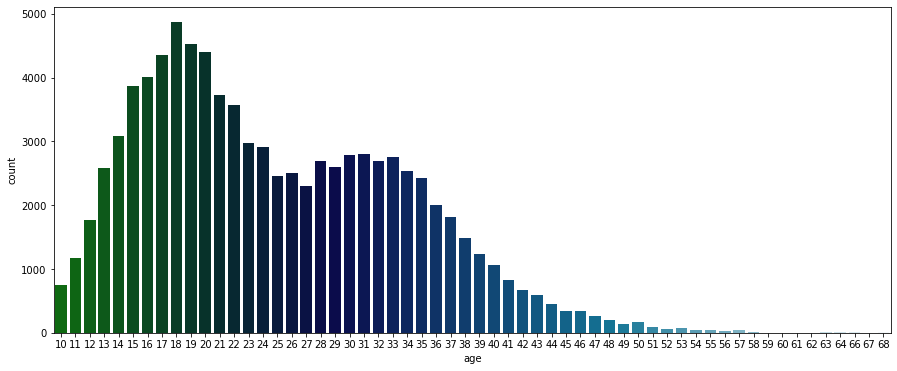

In [17]:
plt.figure(figsize=(15,6))
sns.countplot('age',data=train,palette='ocean')

#### Most users are teenagers. Also a peak can be shown between 29-33 age.

<AxesSubplot:xlabel='followers', ylabel='count'>

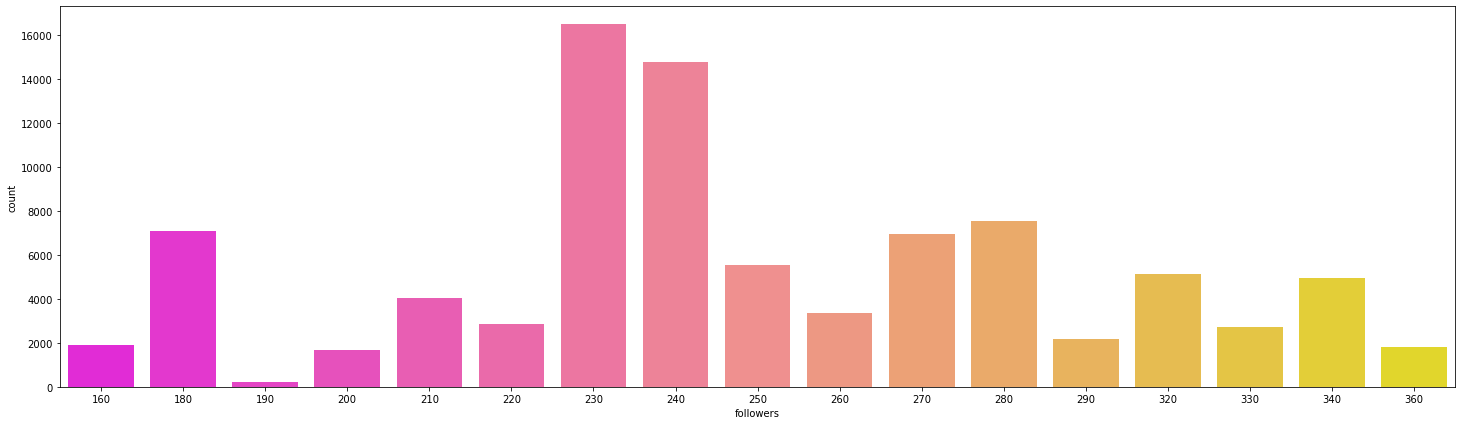

In [18]:
plt.figure(figsize=(25,7))
sns.countplot('followers',data=train,palette='spring')

<AxesSubplot:xlabel='views', ylabel='count'>

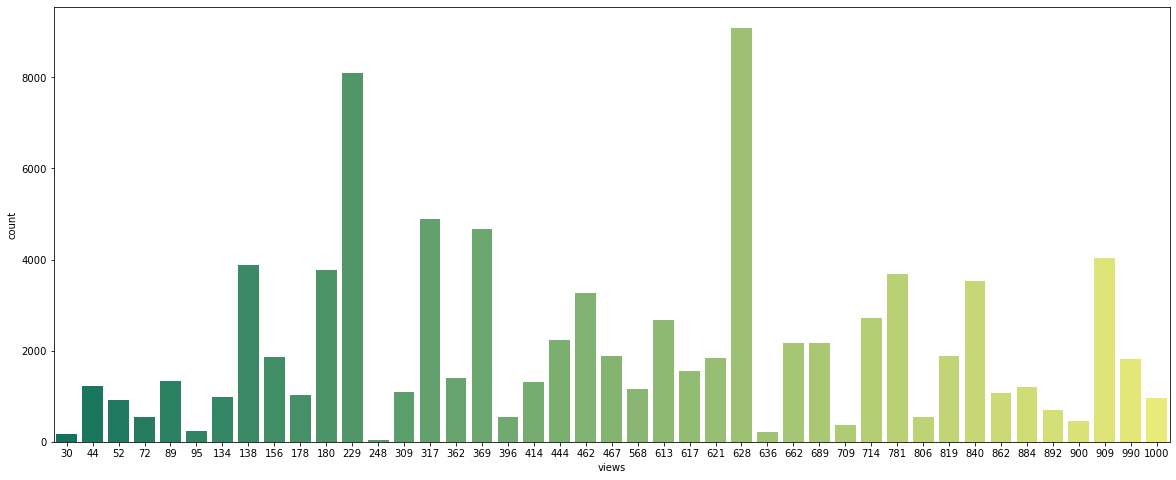

In [19]:
plt.figure(figsize=(20,8))
sns.countplot('views',data=train,palette='summer')

#### For a particular category, maximum number of views received was 8000+

### Categorical data

<AxesSubplot:xlabel='gender', ylabel='count'>

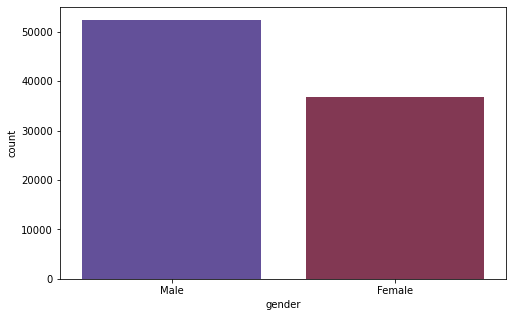

In [20]:
plt.figure(figsize=(8,5))
sns.countplot('gender',data=train,palette='twilight')

#### There are more male users than female users

<AxesSubplot:xlabel='profession', ylabel='count'>

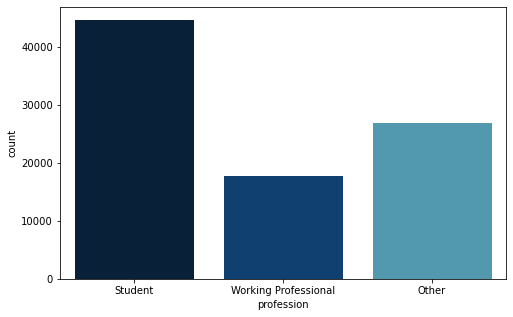

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('profession',data=train,palette='ocean')

#### Most of the users are students

# Model building

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

#### Imported essential libraries

In [23]:
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

#### Encoding has done

In [24]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,1,1,180,1000,4.33
1,2,5304,32,132,14,0,1,330,714,1.79
2,3,1840,12,24,19,1,1,180,138,4.35
3,4,12597,23,112,19,1,1,220,613,3.77
4,5,13626,23,112,27,1,2,220,613,3.13


In [25]:
train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [26]:
# Seperate Features and Target
X= train.drop(columns = ['engagement_score'], axis=1)
y= train['engagement_score']

In [27]:
# 30% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()

<AxesSubplot:>

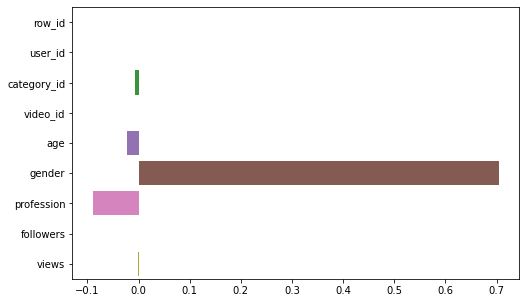

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

#### Gender and profession are the two things that determine Engagement score

In [30]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.7567201821281009


#### Validation Set RMSE score is around 0.75 from this linear model

In [32]:
submission = pd.read_csv('sample_submission_JPlpRcN.csv')
final_predictions = LR.predict(test)
submission['engagement_score'] = final_predictions
submission['engagement_score'] = submission['engagement_score'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)